In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://data.world/julienf/video-games-global-sales-in-volume-1983-2017/workspace/file?filename=vgsalesGlobale.csv
df = pd.read_csv('vgsalesGlobale.csv')

 ### Abbreviations of PLatforms<br>
3DO Interactive Multiplayer (3DO),
Atari 2600 (2600),
Atari 7800 (7800),
Dreamcast (DC),
Game Boy (GB),
Game Boy Advance (GBA),
GameCube (GC),
GameGear (GG),
Microsoft Windows (PC),
Neo Geo (NG),
Nintendo 3DS (3DS),
Nintendo 64 (N64),
Nintendo DS (DS),
Nintendo Entertainment System (NES),
Nintendo Switch (NS),
PC-FX (PCFX),
PlayStation (PS),
PlayStation 2 (PS2),
PlayStation 3 (PS3),
PlayStation 4 (PS4),
PlayStation 5 (PS5),
PlayStation Portable (PSP),
PlayStation Vita (PSV),
Sega CD (SCD),
Sega Genesis (GEN),
Sega Saturn (SAT),
Super Nintendo Entertainment System (SNES),
TurboGrafx-16 (TG16),
Wii (Wii),
Wii U (WiiU),
WonderSwan (WS),
Xbox (XB),
Xbox 360 (X360),
Xbox One (XOne),
Xbox Series X/S (XS),
iOS (iOS)

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Best Selling Games from year released?
# Popular Platforms?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# Make sure NaN rows aren't significant
df[df.isna().any(axis = 1)][:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [7]:
# Fill top 10 NaN rows 
df.loc[179, 'Year'] = 2003
df.loc[377, 'Year'] = 2003
df.loc[431, 'Year'] = 2008
df.loc[470, 'Year'] = 2004
df.loc[470, 'Publisher'] = 'THQ'
df.loc[607, 'Year'] = 1980
df.loc[624, 'Year'] = 2007
df.loc[649, 'Year'] = 2001
df.loc[652, 'Year'] = 2008
df.loc[711, 'Year'] = 2006
df.loc[782, 'Year'] = 2007

In [8]:
games = df.dropna().astype({"Year": int})

In [9]:
# Years with significantly unreported values
dropped_years = [2017, 2020]
games = games[games.Year.isin(dropped_years) == False]

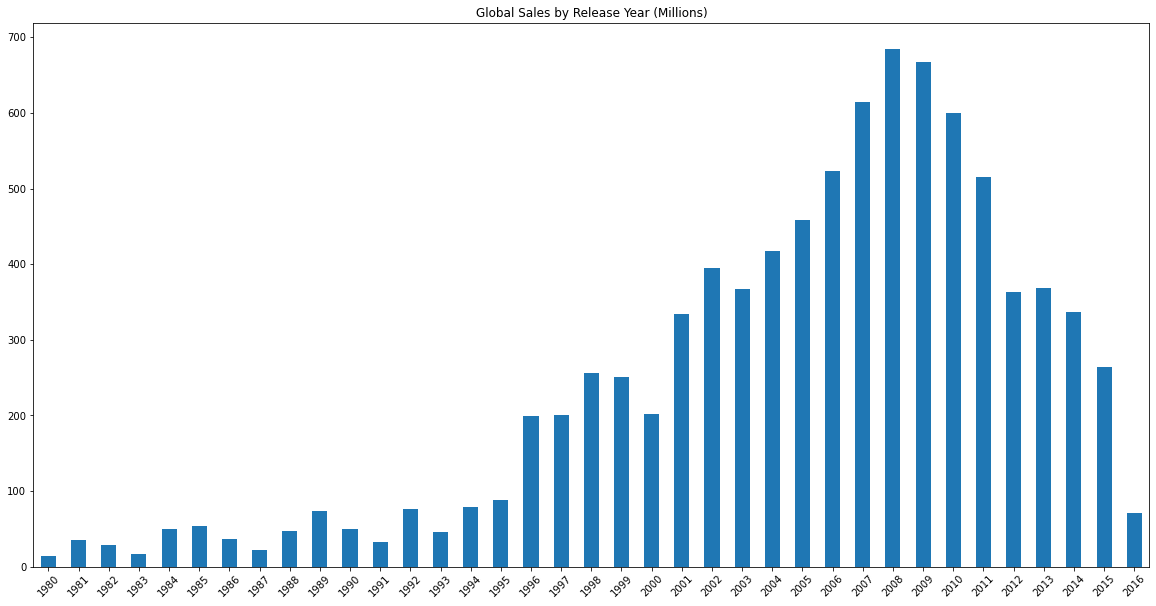

In [10]:
year = games[['Year', 'Global_Sales']].groupby('Year').sum()
year.plot(kind = 'bar', title = 'Global Sales by Release Year (Millions)', figsize = (20, 10), rot = 45, legend = False)
plt.xlabel('')
plt.show()

Even though there was a recession during 2008 video game sales hit a record highs. <br>Lets check out the games released in those top years to see what the fuss is about. 

In [11]:
top_games_years = pd.DataFrame({'Rank': list(range(1,11)),
                                '2006':df.loc[df['Year']==2006].Name.unique()[:10],
                                '2007':df.loc[df['Year']==2007].Name.unique()[:10],
                                '2008':df.loc[df['Year']==2008].Name.unique()[:10],
                                '2009':df.loc[df['Year']==2009].Name.unique()[:10],
                                '2010':df.loc[df['Year']==2010].Name.unique()[:10],
                                '2011':df.loc[df['Year']==2011].Name.unique()[:10]})
top_games_years.set_index('Rank')

,2006,2007,2008,2009,2010,2011
Rank,,,,,,
1,Wii Sports,Wii Fit,Mario Kart Wii,Wii Sports Resort,Kinect Adventures!,Call of Duty: Modern Warfare 3
2,New Super Mario Bros.,Halo 3,Super Smash Bros. Brawl,New Super Mario Bros. Wii,Pokemon Black/Pokemon White,Mario Kart 7
3,Wii Play,Super Mario Galaxy,Grand Theft Auto IV,Wii Fit Plus,Call of Duty: Black Ops,Super Mario 3D Land
4,Pokemon Diamond/Pokemon Pearl,Call of Duty 4: Modern Warfare,Pokémon Platinum Version,Call of Duty: Modern Warfare 2,Gran Turismo 5,Just Dance 3
5,The Legend of Zelda: Twilight Princess,Mario Party DS,Call of Duty: World at War,Pokemon HeartGold/Pokemon SoulSilver,Halo: Reach,The Elder Scrolls V: Skyrim
6,Gears of War,Mario Party 8,Gears of War 2,The Sims 3,Just Dance 2,Battlefield 3
7,Final Fantasy XII,Mario & Sonic at the Olympic Games,Metal Gear Solid 4: Guns of the Patriots,Just Dance,Wii Party,Uncharted 3: Drake's Deception
8,Cooking Mama,LEGO Star Wars: The Complete Saga,LittleBigPlanet,Uncharted 2: Among Thieves,Super Mario Galaxy 2,FIFA 12
9,Guitar Hero II,Assassin's Creed,Monster Hunter Freedom Unite,Halo 3: ODST,Zumba Fitness,Gears of War 3


In [12]:
top_games_sales = df[['Name', 'Publisher', 'Global_Sales']].groupby(['Name', 'Publisher']).sum().sort_values('Global_Sales', ascending = False).reset_index()
top_games_sales['Rank'] = list(range(1,len(top_games_sales)+1))
top_games_sales.set_index('Rank')[:10]

,Name,Publisher,Global_Sales
Rank,,,
1,Wii Sports,Nintendo,82.74
2,Grand Theft Auto V,Take-Two Interactive,55.92
3,Super Mario Bros.,Nintendo,45.31
4,Tetris,Nintendo,35.84
5,Mario Kart Wii,Nintendo,35.82
6,Wii Sports Resort,Nintendo,33.00
7,Pokemon Red/Pokemon Blue,Nintendo,31.37
8,Call of Duty: Black Ops,Activision,31.03
9,Call of Duty: Modern Warfare 3,Activision,30.83


Lets check what top 10 games were released in during the 2006 to 2011 boom period. 

In [13]:
not_in_boom = []
print('Games from Top 10 released during 2006-2011 Boom\n')
for game in top_games_sales.Name.values[:10]:
    if game in top_games_years.values:
        print(f'---> {game}')
    else:
        not_in_boom.append(game)
        print(f'{game}')

Games from Top 10 released during 2006-2011 Boom

---> Wii Sports
Grand Theft Auto V
Super Mario Bros.
Tetris
---> Mario Kart Wii
---> Wii Sports Resort
Pokemon Red/Pokemon Blue
---> Call of Duty: Black Ops
---> Call of Duty: Modern Warfare 3
---> New Super Mario Bros.


We can see that 6 of the top 10 games sold were released between 2006 and 2011!
<br> But what about the other 4?

In [14]:
df.loc[df['Name'].isin(not_in_boom)].iloc[:, [0,1,2,3,10]].sort_values('Name').set_index('Rank')

# Trying to group the games by year was getting complicated because the same game 
# was released in different years on different platforms

,Name,Platform,Year,Global_Sales
Rank,,,,
17,Grand Theft Auto V,PS3,2013.0,21.40
24,Grand Theft Auto V,X360,2013.0,16.38
45,Grand Theft Auto V,PS4,2014.0,11.98
198,Grand Theft Auto V,XOne,2014.0,5.08
1898,Grand Theft Auto V,PC,2015.0,1.08
5,Pokemon Red/Pokemon Blue,GB,1996.0,31.37
2,Super Mario Bros.,NES,1985.0,40.24
201,Super Mario Bros.,GB,1999.0,5.07
6,Tetris,GB,1989.0,30.26


Pokemon, Super Mario, and Tetris were all released before the turn of the century and are among the top sold games of all time. We can see in the graph that sales were on a rise during their release years. Despite this, the overall sales during these release years pales in comparison to that of the late 2000s early 2010s. This could be due to a waning of overall popularity of the video game industry.

<br> Grand Theft Auto V, on the other hand, was released much later during better years for video game sales. Despite the popularity of this game, overall sales were on a decline during these years. Why there is a continuing decline in sales will have to be investigated further. 

# Ranking by Platform

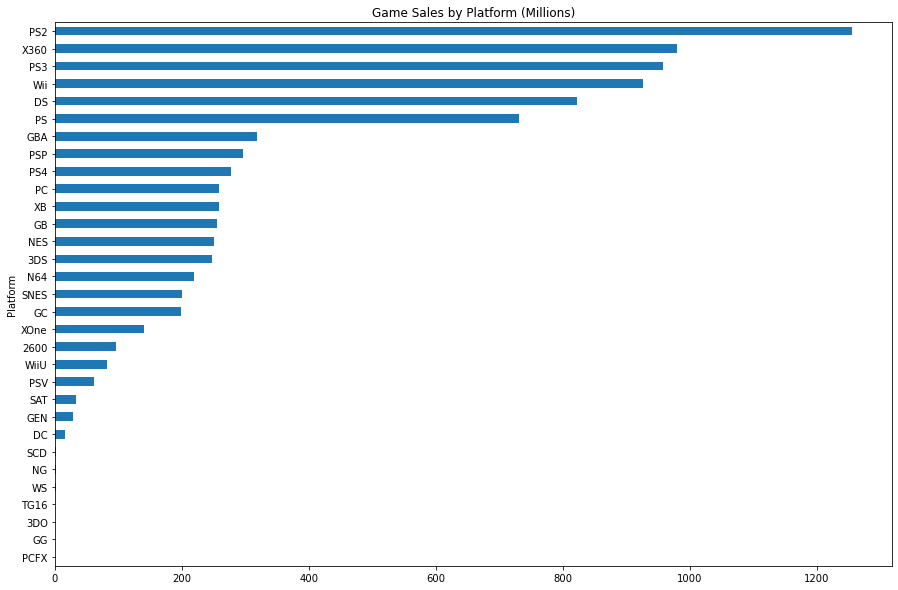

In [15]:
platform = df[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values('Global_Sales', ascending = True)
platform.plot(kind = 'barh', title = 'Game Sales by Platform (Millions)', figsize = (15, 10), rot = 0, legend = False)
plt.show()

# Ranking by Publisher

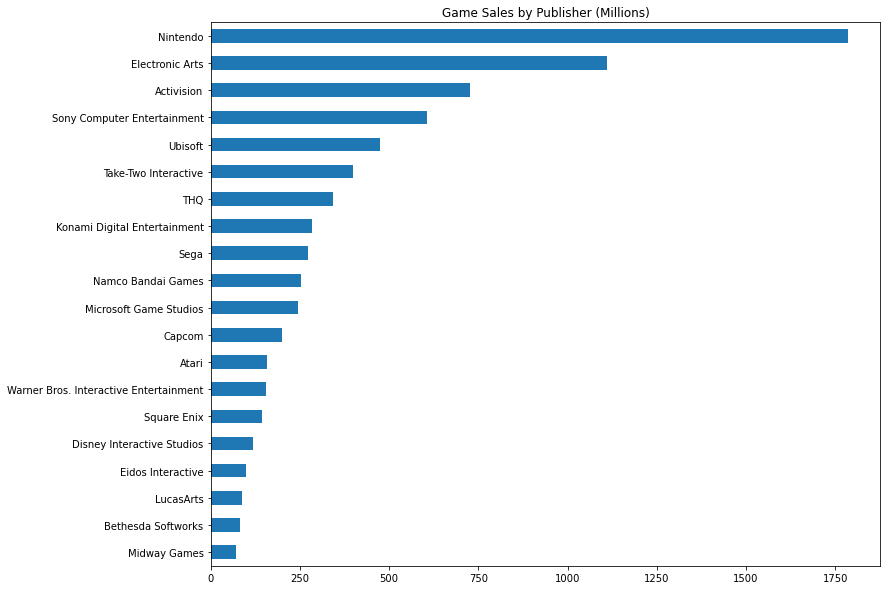

In [16]:
publisher = df[['Publisher', 'Global_Sales']].groupby('Publisher').sum().sort_values('Global_Sales', ascending = False).iloc[:20, :]
publisher = publisher.sort_values('Global_Sales', ascending = True)
publisher.plot(kind = 'barh', title = 'Game Sales by Publisher (Millions)', figsize = (12, 10), rot = 0, legend = False)
plt.ylabel('')
plt.show()

# Ranking by Genre

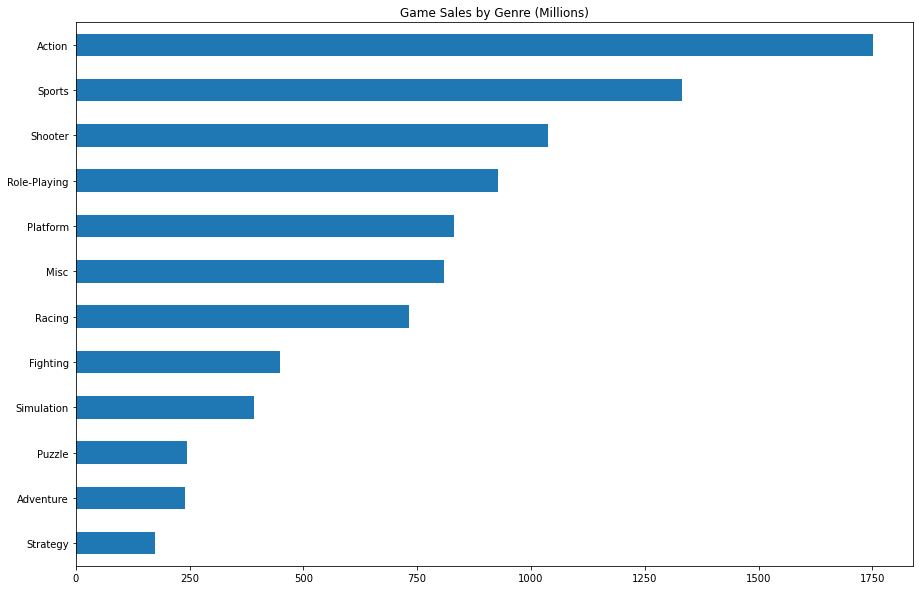

In [17]:
genre = df[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values('Global_Sales', ascending = True)
genre.plot(kind = 'barh', title = 'Game Sales by Genre (Millions)', figsize = (15, 10), rot = 0, legend = False)
plt.ylabel('')
plt.show()